In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import MinMaxScaler


In [2]:
from sklearn import tree

In [3]:
from sklearn.tree import DecisionTreeClassifier 

In [4]:
df = pd.read_csv(r"C:\Users\91952\Downloads\Titanic-Dataset.csv")

In [5]:
df.drop(columns = ['PassengerId', 'Name', 'Ticket','Cabin'], inplace = True)

In [6]:
df.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
603,0,3,male,44.0,0,0,8.0500,S
80,0,3,male,22.0,0,0,9.0000,S
730,1,1,female,29.0,0,0,211.3375,S
815,0,1,male,NaN,0,0,0.0000,S
729,0,3,female,25.0,1,0,7.9250,S


In [7]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns = ['Survived']), df['Survived'], test_size = 0.2, random_state = 42)

In [8]:
x_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
331,1,male,45.5,0,0,28.5000,S
733,2,male,23.0,0,0,13.0000,S
382,3,male,32.0,0,0,7.9250,S
704,3,male,26.0,1,0,7.8542,S
813,3,female,6.0,4,2,31.2750,S


In [9]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [10]:
# Applying Imputation 

si_age = SimpleImputer()
si_embrk = SimpleImputer(strategy = 'most_frequent')

x_train_age = si_age.fit_transform(x_train[['Age']])
x_train_e = si_embrk.fit_transform(x_train[['Embarked']])

x_test_age = si_age.transform(x_test[['Age']])
x_test_e = si_embrk.transform(x_test[['Embarked']])


In [11]:
x_train['Embarked'].isnull()

331    False
733    False
382    False
704    False
813    False
       ...  
106    False
270    False
860    False
435    False
102    False
Name: Embarked, Length: 712, dtype: bool

In [12]:
# One Hot Encoding on Sex and Embarked
ohe_sex = OneHotEncoder(sparse = False, handle_unknown = 'ignore')
ohe_em = OneHotEncoder(sparse = False, handle_unknown = 'ignore')

x_train_sex = ohe_sex.fit_transform(x_train[['Sex']])
x_train_e = ohe_em.fit_transform(x_train_e)

x_test_sex = ohe_sex.transform(x_test[['Sex']])
x_test_e = ohe_em.transform(x_test_e)


In [13]:
x_train_e

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [14]:
x_train_rem = x_train.drop(columns = ['Sex',"Age",'Embarked'])

In [15]:
x_test_rem = x_test.drop(columns = ['Sex',"Age",'Embarked'])

In [16]:
x_train_transformed = np.concatenate((x_train_rem, x_train_age, x_train_sex, x_train_e),axis =1 )


In [17]:
x_test_transformed = np.concatenate((x_test_rem, x_test_age, x_test_sex, x_test_e),axis =1 )

In [18]:
x_test_transformed.shape

(179, 10)

In [19]:

clf = DecisionTreeClassifier()
clf.fit(x_train_transformed, y_train)

DecisionTreeClassifier()

In [20]:
y_pred = clf.predict(x_test_transformed)

In [21]:
from sklearn.metrics import accuracy_score 
accuracy_score(y_test, y_pred)

0.7821229050279329

In [22]:
import pickle

In [23]:
pickle.dump(clf, open('clf.pkl','wb'))
pickle.dump(ohe_sex, open('ohe_sex.pkl', 'wb'))
pickle.dump(ohe_em, open('ohe_embarked', 'wb'))

In [25]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

def print_classification_metrics(y_true, y_pred, y_prob=None, average='binary'):
    
    # Print basic classification report
    print("Classification Report:")
    print(classification_report(y_true, y_pred))
    
    # Print confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_true), yticklabels=np.unique(y_true))
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    # Print additional metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average=average)
    recall = recall_score(y_true, y_pred, average=average)
    f1 = f1_score(y_true, y_pred, average=average)
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.81      0.81       105
           1       0.73      0.74      0.74        74

    accuracy                           0.78       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.78      0.78      0.78       179



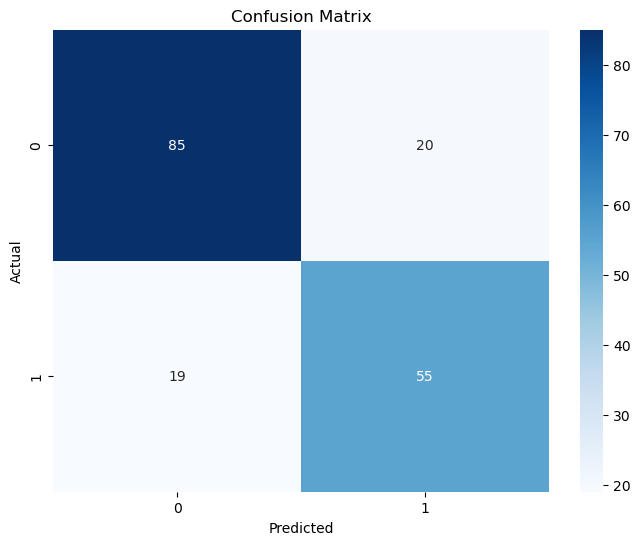

Accuracy: 0.7821
Precision: 0.7333
Recall: 0.7432
F1 Score: 0.7383


In [26]:
print_classification_metrics(y_test, y_pred)